# Movie Recommendation System

Statistical algorithms known as recommender systems, or recommendation systems, make product recommendations to customers based on similarities between products or the purchasing patterns of different users.

**Collaborative Filtering:** Collaborative filtering is the technique of determining how different consumers' purchasing patterns or products are comparable.

**User-based collaborative filtering:** Product B will also be suggested to user Z if two users, x and y, like products A and B and another user, Z, also likes product A.

**Item-based collaborative filtering:** In this products are recommended based on similarities between themselves.
For instance if a user likes product A and product A has properties X and Y, another product B with properties X and Y
will also be recommended to the user.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# The dataset contains around 100,000 movie reviews applied to 9000 movies by 600 users
# Movies dataset contains movieId, title and genres

movie_ids_titles= pd.read_csv("movies.csv")
movie_ids_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [36]:
movie_ids_titles.shape

(9742, 3)

In [37]:
# Ratings dataset contains userId, movieId, rating and timestamp

movie_ids_ratings=pd.read_csv("ratings.csv")
movie_ids_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [38]:
movie_ids_ratings.shape

(100836, 4)

### Data Preprocessing
- a dataframe that consists of userId, moviesId and ratings

In [39]:
movie_ids_titles.drop(['genres'],inplace=True,axis=1)
movie_ids_titles.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [40]:
movie_ids_ratings.drop(['timestamp'],inplace=True,axis=1)
movie_ids_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [41]:
merged_movie_df= pd.merge(movie_ids_ratings, movie_ids_titles, on='movieId')
merged_movie_df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,1,3,4.0,Grumpier Old Men (1995)
2,1,6,4.0,Heat (1995)
3,1,47,5.0,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,"Usual Suspects, The (1995)"


### Data Visualization
- Group the dataset by title and see what information we can get regarding the ratings of movies

In [42]:
merged_movie_df.groupby('title').describe()

userId                          \
                                           count        mean         std   
title                                                                      
'71 (2014)                                   1.0  610.000000         NaN   
'Hellboy': The Seeds of Creation (2004)      1.0  332.000000         NaN   
'Round Midnight (1986)                       2.0  354.500000   31.819805   
'Salem's Lot (2004)                          1.0  345.000000         NaN   
'Til There Was You (1997)                    2.0  229.000000  164.048773   
...                                          ...         ...         ...   
eXistenZ (1999)                             22.0  389.954545  167.161022   
xXx (2002)                                  24.0  272.916667  174.297576   
xXx: State of the Union (2005)               5.0  386.000000  148.801882   
¡Three Amigos! (1986)                       26.0  279.807692  193.794947   
À nous la liberté (Freedom for Us) (1931)    1.0  527.000000         NaN   

                                                                         \
                                             min     25%    50%     75%   
title                                                                     
'71 (2014)                                 610.0  610.00  610.0  610.00   
'Hellboy': The Seeds of Creation (2004)    332.0  332.00  332.0  332.00   
'Round Midnight (1986)                     332.0  343.25  354.5  365.75   
'Salem's Lot (2004)                        345.0  345.00  345.0  345.00   
'Til There Was You (1997)                  113.0  171.00  229.0  287.00   
...                                          ...     ...    ...     ...   
eXistenZ (1999)                             95.0  278.25  419.5  509.25   
xXx (2002)                                   9.0  131.25  240.5  418.50   
xXx: State of the Union (2005)             232.0  274.00  382.0  432.00   
¡Three Amigos! (1986)                        1.0  101.25  260.5  441.25   
À nous la liberté (Freedom for Us) (1931)  527.0  527.00  527.0  527.00   

                                                 movieId            ...  \
                                             max   count      mean  ...   
title                                                               ...   
'71 (2014)                                 610.0     1.0  117867.0  ...   
'Hellboy': The Seeds of Creation (2004)    332.0     1.0   97757.0  ...   
'Round Midnight (1986)                     377.0     2.0   26564.0  ...   
'Salem's Lot (2004)                        345.0     1.0   27751.0  ...   
'Til There Was You (1997)                  345.0     2.0     779.0  ...   
...                                          ...     ...       ...  ...   
eXistenZ (1999)                            608.0    22.0    2600.0  ...   
xXx (2002)                                 610.0    24.0    5507.0  ...   
xXx: State of the Union (2005)             610.0     5.0   33158.0  ...   
¡Three Amigos! (1986)                      599.0    26.0    2478.0  ...   
À nous la liberté (Freedom for Us) (1931)  527.0     1.0    5560.0  ...   

                                                              rating  \
                                                75%       max  count   
title                                                                  
'71 (2014)                                 117867.0  117867.0    1.0   
'Hellboy': The Seeds of Creation (2004)     97757.0   97757.0    1.0   
'Round Midnight (1986)                      26564.0   26564.0    2.0   
'Salem's Lot (2004)                         27751.0   27751.0    1.0   
'Til There Was You (1997)                     779.0     779.0    2.0   
...                                             ...       ...    ...   
eXistenZ (1999)                              2600.0    2600.0   22.0   
xXx (2002)                                   5507.0    5507.0   24.0   
xXx: State of the Union (2005)              33158.0   33158.0    5.0   
¡Three Amig

In [43]:
merged_movie_df.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

> Let's sort the movie titles by the descending order of the average user ratings and see the top 10 movies that have the highest average ratings.

In [44]:
merged_movie_df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Gena the Crocodile (1969)                    5.0
True Stories (1986)                          5.0
Cosmic Scrat-tastrophe (2015)                5.0
Love and Pigeons (1985)                      5.0
Red Sorghum (Hong gao liang) (1987)          5.0
Thin Line Between Love and Hate, A (1996)    5.0
Lesson Faust (1994)                          5.0
Eva (2011)                                   5.0
Who Killed Chea Vichea? (2010)               5.0
Siam Sunset (1999)                           5.0
Name: rating, dtype: float64

In [45]:
# print the movies in the descending order of their rating counts
merged_movie_df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

> A movie which is rated by large number of people is usually a good movie

> create a dataframe that shows the title, mean rating and the rating counts

In [46]:
movie_rating_mean_count=pd.DataFrame(columns=['rating_mean','rating_count'])

movie_rating_mean_count['rating_mean']=merged_movie_df.groupby('title')['rating'].mean()

movie_rating_mean_count['rating_count']=merged_movie_df.groupby('title')['rating'].count()

movie_rating_mean_count.head()

,rating_mean,rating_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<Axes: >

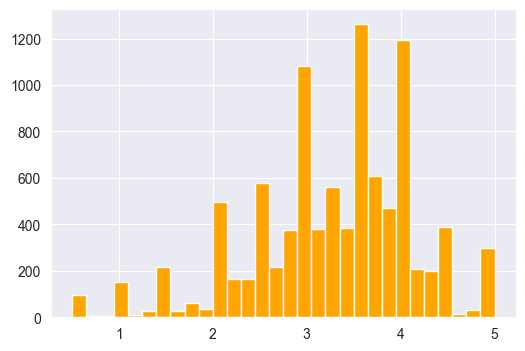

In [47]:
# plot the histogram for the rating mean
plt.figure(figsize=(6,4))
sns.set_style("darkgrid")

movie_rating_mean_count['rating_mean'].hist(bins=30, color='orange')

<Axes: >

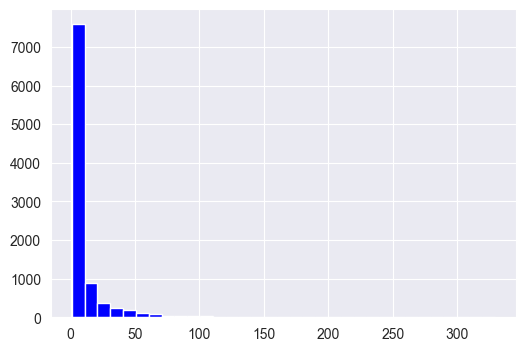

In [48]:
# Distribution of rating count
plt.figure(figsize=(6,4))
sns.set_style("darkgrid")

movie_rating_mean_count["rating_count"].hist(bins=33, color="blue")

There are around 7000 movies with less than 10 rating counts. The number of movies decrease with an increase
in rating counts. Movies with more than 50 ratings are very few.

It is also interestig to see the relationship between mean ratings and rating counts of a movie

<Axes: xlabel='rating_mean', ylabel='rating_count'>

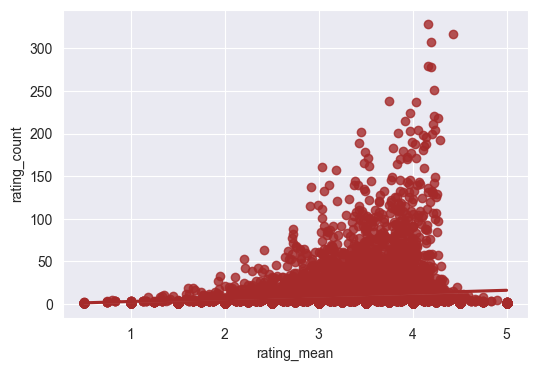

In [49]:
plt.figure(figsize=(6,4))
sns.set_style("darkgrid")

sns.regplot(x="rating_mean",y="rating_count",data=movie_rating_mean_count,color="brown")

From the above graph in the top right portion, you can see that the movies with a higher number of rating counts tend
to have higher mean ratings as well.

Let's sort our dataset by rating counts and see he average ratings of the movies with the top 5 highest number of ratings.

In [50]:
movie_rating_mean_count.sort_values("rating_count",ascending=False).head()

,rating_mean,rating_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


## Item-Based Collaborative Filtering

In item based collaborative filtering, products are recommended based on common characteristics.

The first step is to create a dataframe where each movie is represented by a column and rows contain user ratings for movies.

In [51]:
user_movie_rating_matrix= merged_movie_df.pivot_table(index="userId", columns='title',values='rating')
user_movie_rating_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [52]:
user_movie_rating_matrix.shape

(610, 9719)

Now we will find the movie recommendation based on a single movie and then based on multiple movies

Finding recommendations based on a single-movie- Suppose we want to find the recommendation based on
the movie Pulp Fiction.

First we will filter the column that contains the user ratings for the movie

In [53]:
pulp_fiction_ratings= user_movie_rating_matrix["Pulp Fiction (1994)"]

In [54]:
# Next, we will find the correlation between the user ratings of all the movies and the user ratings for the movie pulp fiction

pulp_fiction_correlations= pd.DataFrame(user_movie_rating_matrix.corrwith(pulp_fiction_ratings),columns=["pf_corr"])
pulp_fiction_correlations.sort_values("pf_corr", ascending=False).head(5)

c:\Users\Abhipushp\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\Abhipushp\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\Abhipushp\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\Abhipushp\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Abhipushp\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,pf_corr
title,
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0
Azumi (2003),1.0
"Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)",1.0
"War Zone, The (1999)",1.0
"Wolfman, The (2010)",1.0


Correlation itself is not giving meaningful results, one solution to this problem can be that in addition to
the correlation between the movies, we can also use rating counts, for the correlated movie as a criteria for finding the
best recommendation.

In [55]:
pulp_fiction_correlations=pulp_fiction_correlations.join(movie_rating_mean_count["rating_count"])

pulp_fiction_correlations.head()

,pf_corr,rating_count
title,,
'71 (2014),NaN,1
'Hellboy': The Seeds of Creation (2004),NaN,1
'Round Midnight (1986),NaN,2
'Salem's Lot (2004),NaN,1
'Til There Was You (1997),NaN,2


The pf_corr column contains some NaN values. This is because there can be movies that are rated by users who did not 
rate Pulp Fiction (1994). In such cases, correlation will be null.

We will remove all the movies with null correlation with Pup Fiction(1994)

In [56]:
pulp_fiction_correlations.dropna(inplace=True)

In [57]:
pulp_fiction_correlations.sort_values("pf_corr",ascending=False).head()

,pf_corr,rating_count
title,,
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0,2
Azumi (2003),1.0,2
"Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)",1.0,2
"War Zone, The (1999)",1.0,2
"Wolfman, The (2010)",1.0,2


> A better way is to find the movies with the rating counts of atleast 50 and having the highest corrleation with Pulp Fiction(1994)

In [58]:
pulp_fiction_correlations_50= pulp_fiction_correlations[pulp_fiction_correlations['rating_count']>50]

pulp_fiction_correlations_50.sort_values("pf_corr",ascending=False).head()

,pf_corr,rating_count
title,,
Pulp Fiction (1994),1.000000,307
"Wolf of Wall Street, The (2013)",0.579915,54
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Interstellar (2014),0.503411,73


### Finding the recommendation based on multiple movies

In this we will see how to recommend movies to a user based on his ratings of multiple movies.
The first step is to create a dataframe, which contains a correlation between all the movies in our dataset
in the form of a matrix.

In [59]:
all_movie_correlations=user_movie_rating_matrix.corr(method="pearson",min_periods=50)

In [60]:
all_movie_correlations.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Now suppose a new user logs into the website

In [61]:
movie_data=[['Forrest Gump (1994)',4.0],['Fight Club (1999)',3.5],['Interstellar (2014)',4.0]]

test_movies=pd.DataFrame(movie_data, columns=['Movie_Name','Movie_Rating'])

test_movies.head()

,Movie_Name,Movie_Rating
0,Forrest Gump (1994),4.0
1,Fight Club (1999),3.5
2,Interstellar (2014),4.0


In [62]:
all_movie_correlations['Forrest Gump (1994)'].dropna()

title
2001: A Space Odyssey (1968)                  0.191558
300 (2007)                                    0.321523
40-Year-Old Virgin, The (2005)                0.156517
Ace Ventura: Pet Detective (1994)             0.137870
Ace Ventura: When Nature Calls (1995)         0.421868
                                                ...   
Willy Wonka & the Chocolate Factory (1971)    0.195081
Wizard of Oz, The (1939)                      0.162368
X-Men (2000)                                  0.200786
X2: X-Men United (2003)                       0.246717
Young Frankenstein (1974)                     0.230049
Name: Forrest Gump (1994), Length: 313, dtype: float64

In [67]:
import pandas as pd

recommended_movies = pd.Series()

for i in range(0, 2):
    movie = all_movie_correlations[test_movies['Movie_Name'][i]].dropna()
    movie = movie.map(lambda movie_corr: movie_corr * test_movies["Movie_Rating"][i])
    # Replace append with concat
    recommended_movies = pd.concat([recommended_movies, movie])

C:\Users\Abhipushp\AppData\Local\Temp\ipykernel_11596\854086393.py:9: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  recommended_movies = pd.concat([recommended_movies, movie])


In [68]:
recommended_movies

2001: A Space Odyssey (1968)                  0.766231
300 (2007)                                    1.286094
40-Year-Old Virgin, The (2005)                0.626066
Ace Ventura: Pet Detective (1994)             0.551479
Ace Ventura: When Nature Calls (1995)         1.687472
                                                ...   
Who Framed Roger Rabbit? (1988)               0.874334
Willy Wonka & the Chocolate Factory (1971)    0.663971
Wizard of Oz, The (1939)                     -0.971160
X-Men (2000)                                 -0.063318
X2: X-Men United (2003)                      -0.661265
Length: 529, dtype: float64

In [69]:
recommended_movies.sort_values(inplace=True,ascending=False)

print(recommended_movies.head(10))

Forrest Gump (1994)                           4.000000
Fight Club (1999)                             3.500000
Mr. Holland's Opus (1995)                     2.608575
Lock, Stock & Two Smoking Barrels (1998)      2.570366
Django Unchained (2012)                       2.225161
Life Is Beautiful (La Vita è bella) (1997)    2.203741
Pocahontas (1995)                             2.200471
Big (1988)                                    1.969404
Good Will Hunting (1997)                      1.936169
Pulp Fiction (1994)                           1.902128
dtype: float64
